In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Data Validation and Cleaning
* Find outliers and remove
* Reformat data when applicable


Data

* Loyalty Card Number: Identification method, likely used for merging data

* Lifestate: Can be used to identify spending patterns

* Premium Customer: Way to identify wealth, could be combined wiht lifestage (renamed to make clearer)

In [2]:
pd.set_option('display.max_columns', None)
customer_info = pd.read_csv("Dataset/QVI_purchase_behaviour.csv")
customer_info

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [3]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
print(f' Customer Status: {customer_info['PREMIUM_CUSTOMER'].unique()}')
print(f' Lifestages: {customer_info['LIFESTAGE'].unique()}')

 Customer Status: ['Premium' 'Mainstream' 'Budget']
 Lifestages: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


Data

* Date: Needs to change type, but can be used for sales over time or which items are popular during certain times
* Store_Number: Identification for store, important when evaluating store profit
* Loyalty Card Number: Used for merging
* TXN_ID: Transaction ID
* Product Number/Product Name: For item identification
* Product quantity: Quantity of sale
* Tot Sales: Total Profit

Missing Data
* Product_Price: Calculate average price of product
* Product_Weight: Extract value from product_name

In [5]:
transaction_df = pd.read_excel("Dataset/QVI_transaction_data.xlsx")
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
transaction_df.sort_values(by="PROD_QTY", ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
228749,43604,232,232138,235978,109,Pringles Barbeque 134g,5,18.5
117802,43604,176,176471,177469,17,Kettle Sensations BBQ&Maple 150g,5,23.0
228711,43329,205,205149,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
238397,43603,238,238337,243243,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
238395,43604,238,238250,242874,88,Kettle Honey Soy Chicken 175g,5,27.0


The Two orders of Dorito Corn Chip seems to be outliers due to the Production Quantity and Total Sale being much larger than intended. These two orders are removed to eliminate bias.

In [8]:
transaction_df.drop(index=[69762,69763], inplace=True)

In [9]:
transaction_df.sort_values(by="PROD_QTY", ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5415,43332,236,236116,239252,12,Natural Chip Co Tmato Hrb&Spce 175g,5,15.0
32796,43603,236,236033,238735,59,Old El Paso Salsa Dip Tomato Med 300g,5,25.5
5107,43329,54,54225,48172,46,Kettle Original 175g,5,27.0
80732,43603,49,49309,45816,30,Doritos Corn Chips Cheese Supreme 170g,5,22.0
32762,43331,227,227046,228561,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.5
32765,43328,227,227134,229083,95,Sunbites Whlegrn Crisps Frch/Onin 90g,5,8.5
135336,43604,95,95317,95544,46,Kettle Original 175g,5,27.0
5109,43330,57,57122,51950,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,5,23.0
150322,43599,6,6465,6276,64,Red Rock Deli SR Salsa & Mzzrlla 150g,5,13.5
17145,43328,202,202289,202104,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5


In [10]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [11]:
transaction_df_cleaned = transaction_df.copy()
transaction_df_cleaned['PROD_PRICE_$'] = transaction_df_cleaned['TOT_SALES']/transaction_df_cleaned['PROD_QTY']
transaction_df_cleaned['DATE'] = pd.to_datetime(transaction_df_cleaned['DATE'], origin='1899-12-30', unit='D') # The original value are days since the excel value
transaction_df_cleaned['YEAR'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.year
transaction_df_cleaned['MONTH'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.month
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_NAME'].str.extract(r'(?i)(\d{2,4})g')[0] # The (?i) allows us to ignore capitalization, the rest allows us to extract a number 2 to 4 digits followed by g
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].str[0:3]
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].astype(int)
transaction_df_cleaned.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,YEAR,MONTH,PROD_WEIGHT_G
96637,2018-10-05,229,229192,231496,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,1.9,2018,10,160
17837,2019-02-16,24,24142,21099,25,Pringles SourCream Onion 134g,2,7.4,3.7,2019,2,134
248776,2019-06-27,138,138071,140932,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.4,2019,6,175
77579,2018-11-17,185,185145,187981,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,2.7,2018,11,150
164268,2018-11-15,175,175312,176660,44,Thins Chips Light& Tangy 175g,2,6.6,3.3,2018,11,175
251419,2018-07-27,173,173027,174341,81,Pringles Original Crisps 134g,2,7.4,3.7,2018,7,134
33152,2019-02-12,5,5052,4684,25,Pringles SourCream Onion 134g,2,7.4,3.7,2019,2,134
165022,2018-08-05,185,185052,187883,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1,5.1,2018,8,300
53587,2019-06-26,247,247004,248620,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,2019,6,150
193756,2019-06-24,116,116103,119768,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,4.6,2019,6,150


In [12]:
customer_transaction_merged = customer_info.merge(transaction_df_cleaned, on="LYLTY_CARD_NBR")
customer_transaction_merged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,YEAR,MONTH,PROD_WEIGHT_G
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,2018,10,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,2018,9,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,2019,3,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,2019,3,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,2018,11,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,3.6,2018,12,210
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,2018,10,150
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,2018,10,165
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,5.1,2018,10,300


In [13]:
title_order = ["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER", "DATE", "YEAR", "MONTH", "STORE_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_QTY", "TOT_SALES", "PROD_PRICE_$", "PROD_WEIGHT_G"]
customer_transaction_merged = customer_transaction_merged[title_order]
customer_transaction_merged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,YEAR,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,PROD_WEIGHT_G
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,2018,10,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,2018,9,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,2019,3,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,2019,3,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,2018,11,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,2018,12,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,3.6,210
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,2018,10,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,150
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,2018,10,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,165
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,2018,10,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,5.1,300


In [14]:
customer_transaction_merged.isnull().sum() # No missing values, can begin analysis

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
YEAR                0
MONTH               0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_PRICE_$        0
PROD_WEIGHT_G       0
dtype: int64

Topics to answer
1. Has the total sales of the store improved over the years, to evaluate the financial status of the company. (only 2 years so not useful)
2. Which item is the most popular based on each customer status and lifestage
3. Do premium customer tend to buy in a higher quantity or higher average price
4. Which 10 product has the most value (grams per dollar)
5. Do more people buy larger items, median sized items, or smaller items (Create Profile based on median weight)

1. Has the total sales of the store improved over the years, to evaluate the financial status of the company. (only 2 years so not useful)

[]

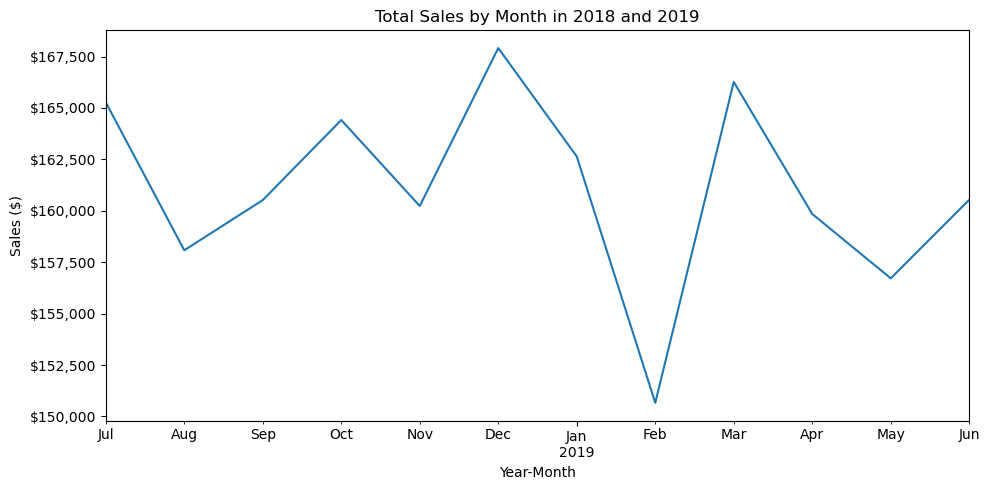

In [15]:
monthly_sales = customer_transaction_merged.groupby(
    customer_transaction_merged['DATE'].dt.to_period('M') # group by month
)['TOT_SALES'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5))
plt.title('Total Sales by Month in 2018 and 2019')
plt.ylabel('Sales ($)')
plt.xlabel('Year-Month')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.plot()

Topic 1 Analysis

* Monthly sales from July 2018 to June 2019 fluctuated between $151,000 and $167,500, an approximate 10% variation. This reflects a stable financial performance throughout the year. Sales peaked in December, likely due to seasonal demand, which presents an opportunity for holiday promotions.
* The lowest sales occurred in February, potentially due to reduced demand following high volume holiday purchases. To avoid overstocking, bundling strategies or targeted promotions during slower months could help drive additional revenue.
* Overall, the consistent monthly range indicates steady and predictable market demand, offering a strong foundation for category planning and future promotional strategies.

2. How does customer status and lifestage affect their purchasing pattern of the top 5 items.

In [50]:
top_5_items = (
    customer_transaction_merged['PROD_NAME'].value_counts().head(5).index
    )
top_5_items

Index(['Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Cobs Popd Sea Salt  Chips 110g'],
      dtype='object', name='PROD_NAME')

In [52]:
top_5_df = customer_transaction_merged[customer_transaction_merged["PROD_NAME"].isin(top_5_items)]
top_5_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,YEAR,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,PROD_WEIGHT_G
37,1034,RETIREES,Premium,2019-03-24,2019,3,1,38,75,Cobs Popd Sea Salt Chips 110g,1,3.8,3.8,110
47,1046,YOUNG SINGLES/COUPLES,Budget,2019-02-13,2019,2,1,51,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,4.2,165
92,1086,YOUNG SINGLES/COUPLES,Budget,2019-02-13,2019,2,1,97,75,Cobs Popd Sea Salt Chips 110g,1,3.8,3.8,110
106,1097,RETIREES,Budget,2019-01-24,2019,1,1,112,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,5.4,175
116,1104,RETIREES,Mainstream,2019-05-23,2019,5,1,122,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,4.2,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264784,272390,NEW FAMILIES,Budget,2019-05-11,2019,5,272,270204,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,4.2,165
264787,272392,MIDAGE SINGLES/COUPLES,Premium,2018-09-29,2018,9,272,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,3.8,110
264801,883791,OLDER SINGLES/COUPLES,Mainstream,2018-09-29,2018,9,237,88100,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,3.8,110
264804,2330031,MIDAGE SINGLES/COUPLES,Premium,2018-07-07,2018,7,77,236716,102,Kettle Mozzarella Basil & Pesto 175g,1,5.4,5.4,175


In [58]:
top_5_premium = top_5_df.groupby("PREMIUM_CUSTOMER")["PROD_NAME"].value_counts()
top_5_premium

PREMIUM_CUSTOMER  PROD_NAME                               
Budget            Kettle Mozzarella   Basil & Pesto 175g      1166
                  Cobs Popd Sea Salt  Chips 110g              1132
                  Kettle Tortilla ChpsHny&Jlpno Chili 150g    1128
                  Tyrrells Crisps     Ched & Chives 165g      1108
                  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1091
Mainstream        Kettle Tortilla ChpsHny&Jlpno Chili 150g    1360
                  Tyrrells Crisps     Ched & Chives 165g      1324
                  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1313
                  Cobs Popd Sea Salt  Chips 110g              1298
                  Kettle Mozzarella   Basil & Pesto 175g      1282
Premium           Cobs Popd Swt/Chlli &Sr/Cream Chips 110g     865
                  Kettle Mozzarella   Basil & Pesto 175g       856
                  Tyrrells Crisps     Ched & Chives 165g       836
                  Cobs Popd Sea Salt  Chips 110g               835
   

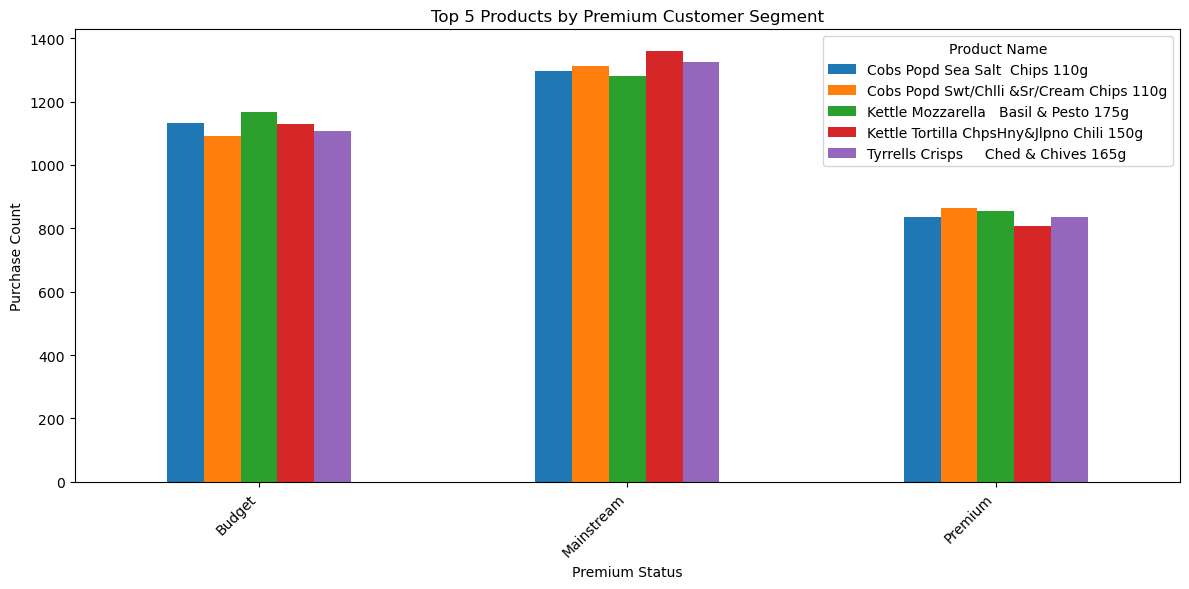

In [70]:
top_5_premium_unstacked = top_5_premium.unstack() # unstack makes PROD_NAME first row again
top_5_premium_unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Products by Premium Customer Segment')
plt.xlabel('Premium Status')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

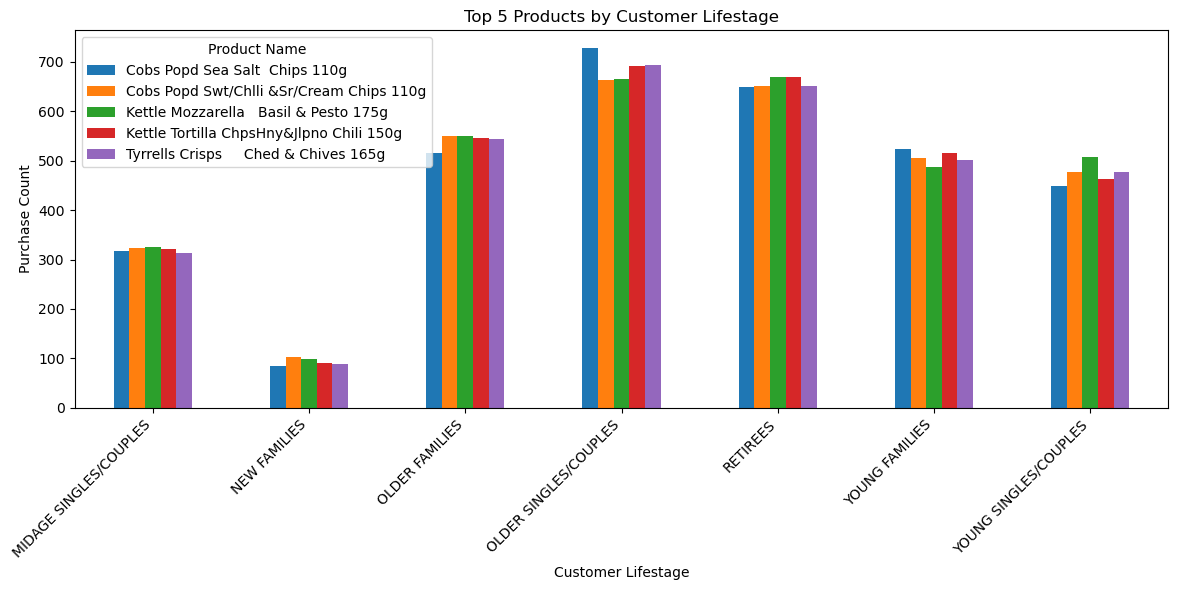

In [ ]:
top_5_lifestage = top_5_df.groupby("LIFESTAGE")["PROD_NAME"].value_counts()
top_5_lifestage_unstacked = top_5_lifestage.unstack()
top_5_lifestage_unstacked.plot(kind="bar", figsize=(12,6))
plt.title('Top 5 Products by Customer Lifestage')
plt.xlabel('Customer Lifestage')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

Topic 2 Anaysis:
Top 5 Chips:
* Two of the top selling chips are from the brands Cobs Popped and Kettle, suggesting these two brands are key drivers of chip sales. 
* Two of the top chips have Chili flavor, suggesting a potential trend towards spicy chips.
* The store manager could inquire about more Spicy chips from these top brands to boost sale while the flavor is trending.

Premium Customer
* The distribution between top 5 chips for all premium status seems to be evenly distributed, indicating that these chips are popular among for everyone. 
* Mainstream has the highest purchase amount, followed closely by Budget customers. This may suggest that most customers are middle to lower class.
* It is impossible for the store to decrease the prices on these items, but bundled deals or larger sales on items that are about to expire may increase purchase due to the customer base being middle-lower class.

Customer Lifestage
* Similar to Premium Customer, the purchase pattern for the top 5 chips are distributed evenly.
* However, there is notable polarization in customer ages, with most purchases coming from either younger or older lifestage groups.

